<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>October 25, 2016: class
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (October 25, 2016) class in Python, about series expansion.
</div>

In [1]:
from sympy import *

init_printing()

In [35]:
t, m, i, k, n = symbols('t m i k n')
a, b = IndexedBase('a'), IndexedBase('b')

In [84]:
ones_fn = Lambda([t], 1/(1-t))
series(ones_fn(t), t, n=20)

In [4]:
help(series)

Help on function series in module sympy.series.series:

series(expr, x=None, x0=0, n=6, dir='+')
    Series expansion of expr around point `x = x0`.
    
    See the doctring of Expr.series() for complete details of this wrapper.



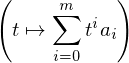

In [14]:
a_fn = Lambda([t], Sum(a[i]*t**i, (i, 0, m)))
a_fn

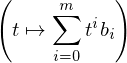

In [15]:
b_fn = Lambda([t], Sum(b[i]*t**i, (i, 0, m)))
b_fn

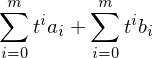

In [17]:
ab_sum = a_fn(t) + b_fn(t)
ab_sum

In [20]:
expanded_sum = ab_sum.subs({m:10}).doit()
expanded_sum

In [21]:
expanded_sum.collect(t)

In [22]:
help(collect)

Help on function collect in module sympy.simplify.radsimp:

collect(expr, syms, func=None, evaluate=None, exact=False, distribute_order_term=True)
    Collect additive terms of an expression.
    
    This function collects additive terms of an expression with respect
    to a list of expression up to powers with rational exponents. By the
    term symbol here are meant arbitrary expressions, which can contain
    powers, products, sums etc. In other words symbol is a pattern which
    will be searched for in the expression's terms.
    
    The input expression is not expanded by :func:`collect`, so user is
    expected to provide an expression is an appropriate form. This makes
    :func:`collect` more predictable as there is no magic happening behind the
    scenes. However, it is important to note, that powers of products are
    converted to products of powers using the :func:`expand_power_base`
    function.
    
    There are two possible types of output. First, if ``evaluate`` 

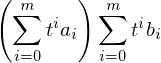

In [23]:
ab_prod = a_fn(t) * b_fn(t)
ab_prod

In [29]:
expanded_prod = ab_prod.subs({m:10}).doit()
expanded_prod

In [25]:
expanded_prod.expand()

In [30]:
complete_expansion = expanded_prod.expand().collect(t)
complete_expansion

In [32]:
complete_expansion.coeff(t, n=5)

In [40]:
convolution = Sum(Sum(a[k]*b[n-k], (k, 0, n))*t**n, (n,0, m)).subs({m:10}).doit()
convolution

In [49]:
eqs = [Eq(convolution.coeff(t, n=0), 1)] + [Eq(convolution.coeff(t, n=i), 0) for i in range(1, 11)]
eqs

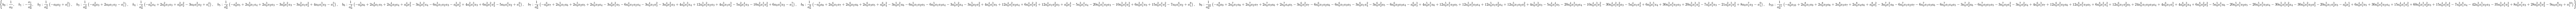

In [51]:
sols = solve(eqs, [b[i] for i in range(11)])
sols

In [53]:
substitutions = {a[0]:1, a[1]:-1}
substitutions.update({a[i]:0 for i in range(2, 11)})
{b_key:v.subs(substitutions) for b_key, v in sols.items()}

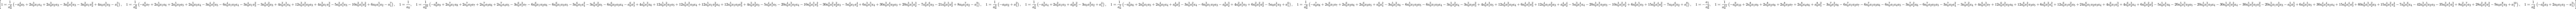

In [55]:
substitutions = {b[i]:1 for i in range(11)}
a_eqs = [Eq(b_key, v).subs(substitutions) for b_key, v in sols.items()]
a_eqs

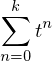

In [65]:
term = Sum(t**n, (n, 0, k))
term

In [66]:
expanded = term.subs({k:20}).doit()
expanded

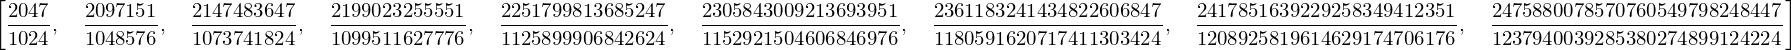

In [69]:
[term.subs({k:kv}).subs({t:Integer(1)/2}).doit() for kv in range(10, 100, 10)]

In [70]:
limit(term.subs(t, Integer(1)/2), k, oo)

In [81]:
term.subs({k:oo, t:Integer(1)/2}).doit()

In [79]:
limit(term.subs(t, Integer(1)/4), k, oo)

In [82]:
term.subs({k:oo, t:-Integer(1)/4}).doit()

In [77]:
limit(term.subs(t, 2), k, oo)

In [85]:
ones_fn(t**2).series(t, n=20)

In [86]:
ones_fn(t**3).series(t, n=20)

In [87]:
ones_fn(-t).series(t, n=20)

In [92]:
ones_fn(3*t).series(t, n=20)

In [94]:
gen_powers = ones_fn(k*t).series(t, n=20)
gen_powers

In [95]:
substitutions = {a[i]:gen_powers.coeff(t, n=i) for i in range(20) }
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

In [98]:
substitutions = {a[0]:1, a[1]:-1, a[2]:-1 }
substitutions.update({a[i]:0 for i in range(3, 11)})
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

In [99]:
substitutions = {a[0]:1, a[1]:-2, a[2]:1 }
substitutions.update({a[i]:0 for i in range(3, 11)})
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.